In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8)})

In [2]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [3]:
# plt.style.use('ggplot')
plt.style.use('fast')

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

In [5]:
# %matplotlib notebook

In [6]:
#reading data files
df = pd.read_csv("../Data/2018-2010_import.csv")

In [7]:
#checking first few columns
df.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED.",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR MELONS.,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCHES; INULIN; WHEAT GLUTEN.,NaN,AFGHANISTAN TIS,2018


In [8]:
# df.HSCode.plot.hist(bins = 30)

In [9]:
df.isna().sum()

HSCode       0    
Commodity    0    
value        14027
country      0    
year         0    
dtype: int64

In [10]:
# checking total number of years we are dealing with 
df.year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010], dtype=int64)

In [11]:
# checking total number of country we are impoting from
df.country.unique(), df.country.unique().shape

(array(['AFGHANISTAN TIS', 'ALBANIA', 'ALGERIA', 'AMERI SAMOA', 'ANDORRA',
        'ANGOLA', 'ANGUILLA', 'ANTARTICA', 'ANTIGUA', 'ARGENTINA',
        'ARMENIA', 'ARUBA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN',
        'BAHAMAS', 'BAHARAIN IS', 'BANGLADESH PR', 'BARBADOS', 'BELARUS',
        'BELGIUM', 'BELIZE', 'BENIN', 'BERMUDA', 'BHUTAN', 'BOLIVIA',
        'BOSNIA-HRZGOVIN', 'BOTSWANA', 'BR VIRGN IS', 'BRAZIL', 'BRUNEI',
        'BULGARIA', 'BURKINA FASO', 'BURUNDI', 'C AFRI REP', 'CAMBODIA',
        'CAMEROON', 'CANADA', 'CAPE VERDE IS', 'CAYMAN IS', 'CHAD',
        'CHILE', 'CHINA P RP', 'CHRISTMAS IS.', 'COCOS IS', 'COLOMBIA',
        'COMOROS', 'CONGO D. REP.', 'CONGO P REP', 'COOK IS', 'COSTA RICA',
        "COTE D' IVOIRE", 'CROATIA', 'CUBA', 'CYPRUS', 'CZECH REPUBLIC',
        'DENMARK', 'DJIBOUTI', 'DOMINIC REP', 'DOMINICA', 'ECUADOR',
        'EGYPT A RP', 'EL SALVADOR', 'EQUTL GUINEA', 'ERITREA', 'ESTONIA',
        'ETHIOPIA', 'FAROE IS.', 'FIJI IS', 'FINLAND', 'FR GUIANA',


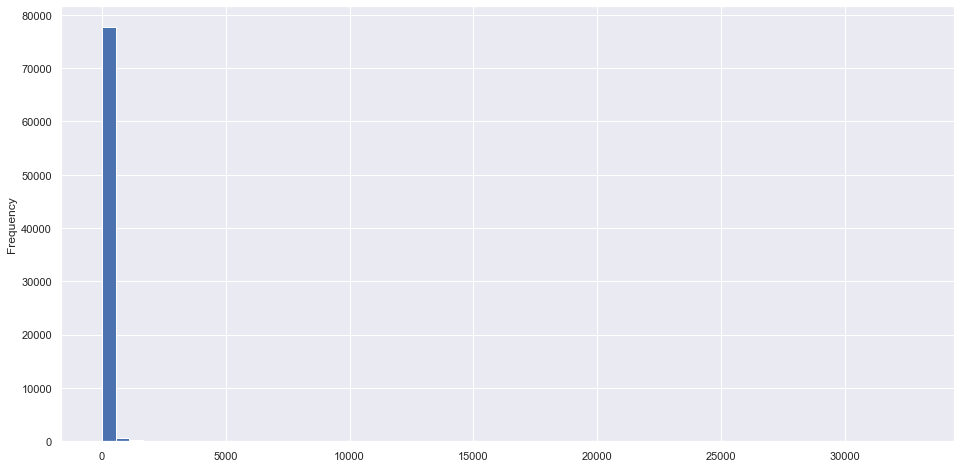

In [12]:
# Histogram for values 
df.value.plot.hist(bins = 60, figsize = (16,8))

In [13]:
df['value'].describe()

count    79068.000000
mean     63.289855   
std      666.652363  
min      0.000000    
25%      0.030000    
50%      0.380000    
75%      4.910000    
max      32781.570000
Name: value, dtype: float64

In [14]:
# checking the median
df.median()

HSCode    54.00  
value     0.38   
year      2015.00
dtype: float64

In [15]:
# checking 90% data range
df.quantile(0.9)['value']

40.13

In [16]:
# checking skewness
df['value'].skew()

24.748972313844245

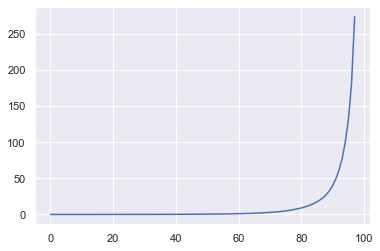

In [17]:
# checking quantile and ploting it
x = []
y = []
for i in range(0,98):
    
    yval = df.quantile(i/100)['value']
    x.append(i)
    y.append(yval)

    
plt.plot(x,y)

In [18]:
# dividing the data set into two for clear visualization
higher_transactions = df[df['value']>1000]
lower_transactions = df[df['value']<1000]

In [19]:
higher_transactions.shape

(793, 5)

In [20]:
lower_transactions.shape

(78275, 5)

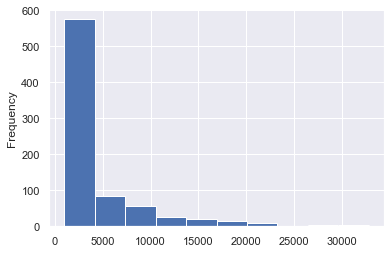

In [21]:
higher_transactions.value.plot.hist()

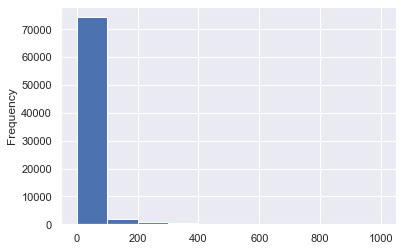

In [22]:
lower_transactions.value.plot.hist()

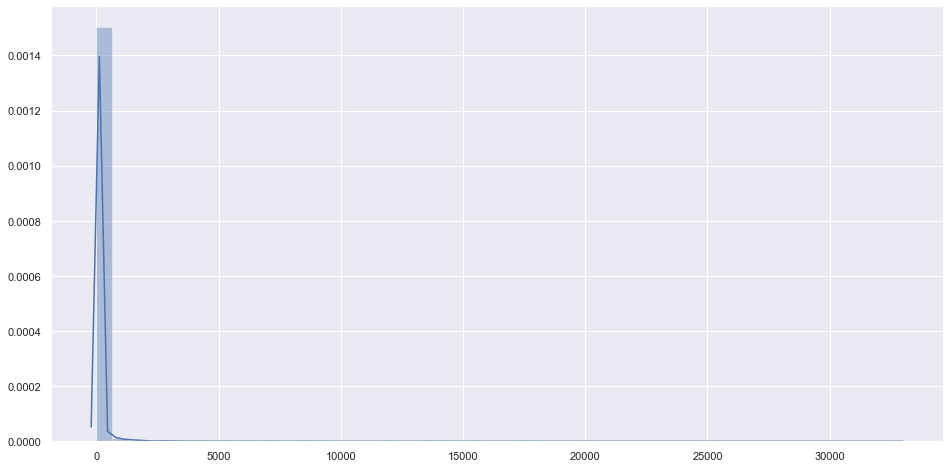

In [23]:
# Histogram plot for the whole dataset
plt.figure(figsize=(16,8))
sns.distplot(df.dropna().value.values)

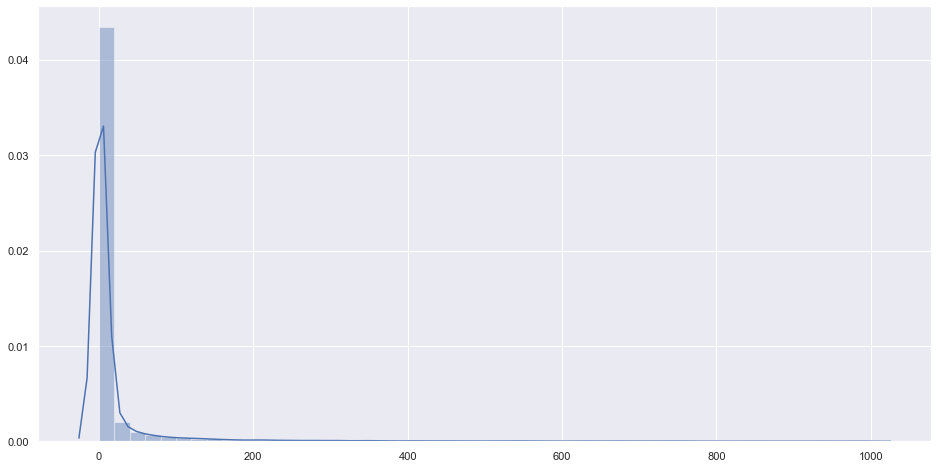

In [24]:
# histogram dstribution for the lower transaction
plt.figure(figsize=(16,8))
sns.distplot(lower_transactions.dropna().value.values)

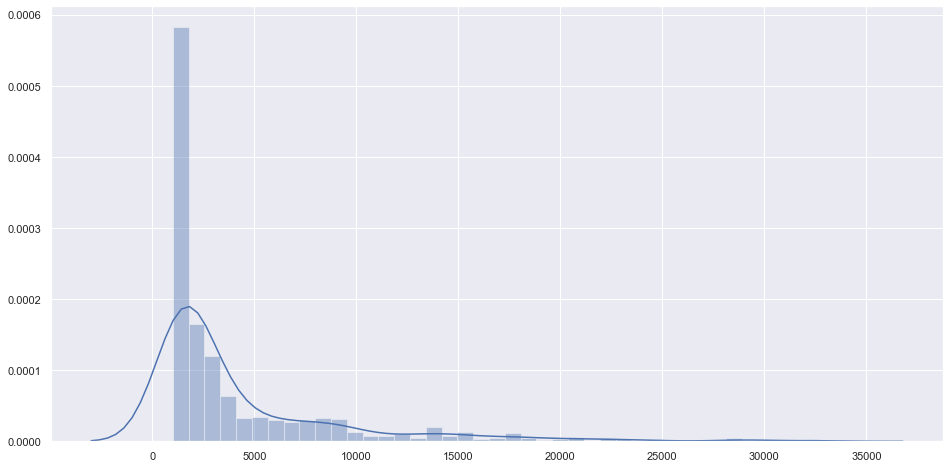

In [25]:
# histogram for upper range transaction
plt.figure(figsize=(16,8))
sns.distplot(higher_transactions.dropna().value.values)

In [26]:
# grouping by country and year and taking the sum
df.groupby(['country','year']).sum()

HSCode   value
country         year                
AFGHANISTAN TIS 2010  1444    146.01
                2011  1806    132.49
                2012  1884    159.53
                2013  2630    208.76
                2014  2213    261.92
...                    ...       ...
ZIMBABWE        2014  1061    32.69 
                2015  1659    24.44 
                2016  1604    60.45 
                2017  2644    124.40
                2018  2108    15.62 

[2072 rows x 2 columns]

In [27]:
# grouping by year and then the country
df.groupby(['year', 'country']).sum()

HSCode    value
year country                         
2010 AFGHANISTAN TIS  1444    146.01 
     ALBANIA          279     0.11   
     ALGERIA          1313    1816.19
     AMERI SAMOA      635     0.15   
     ANDORRA          187     0.01   
...                   ...      ...   
2018 VIRGIN IS US     2046    1.54   
     WALLIS F IS      314     0.00   
     YEMEN REPUBLC    1598    23.50  
     ZAMBIA           2800    1021.00
     ZIMBABWE         2108    15.62  

[2072 rows x 2 columns]

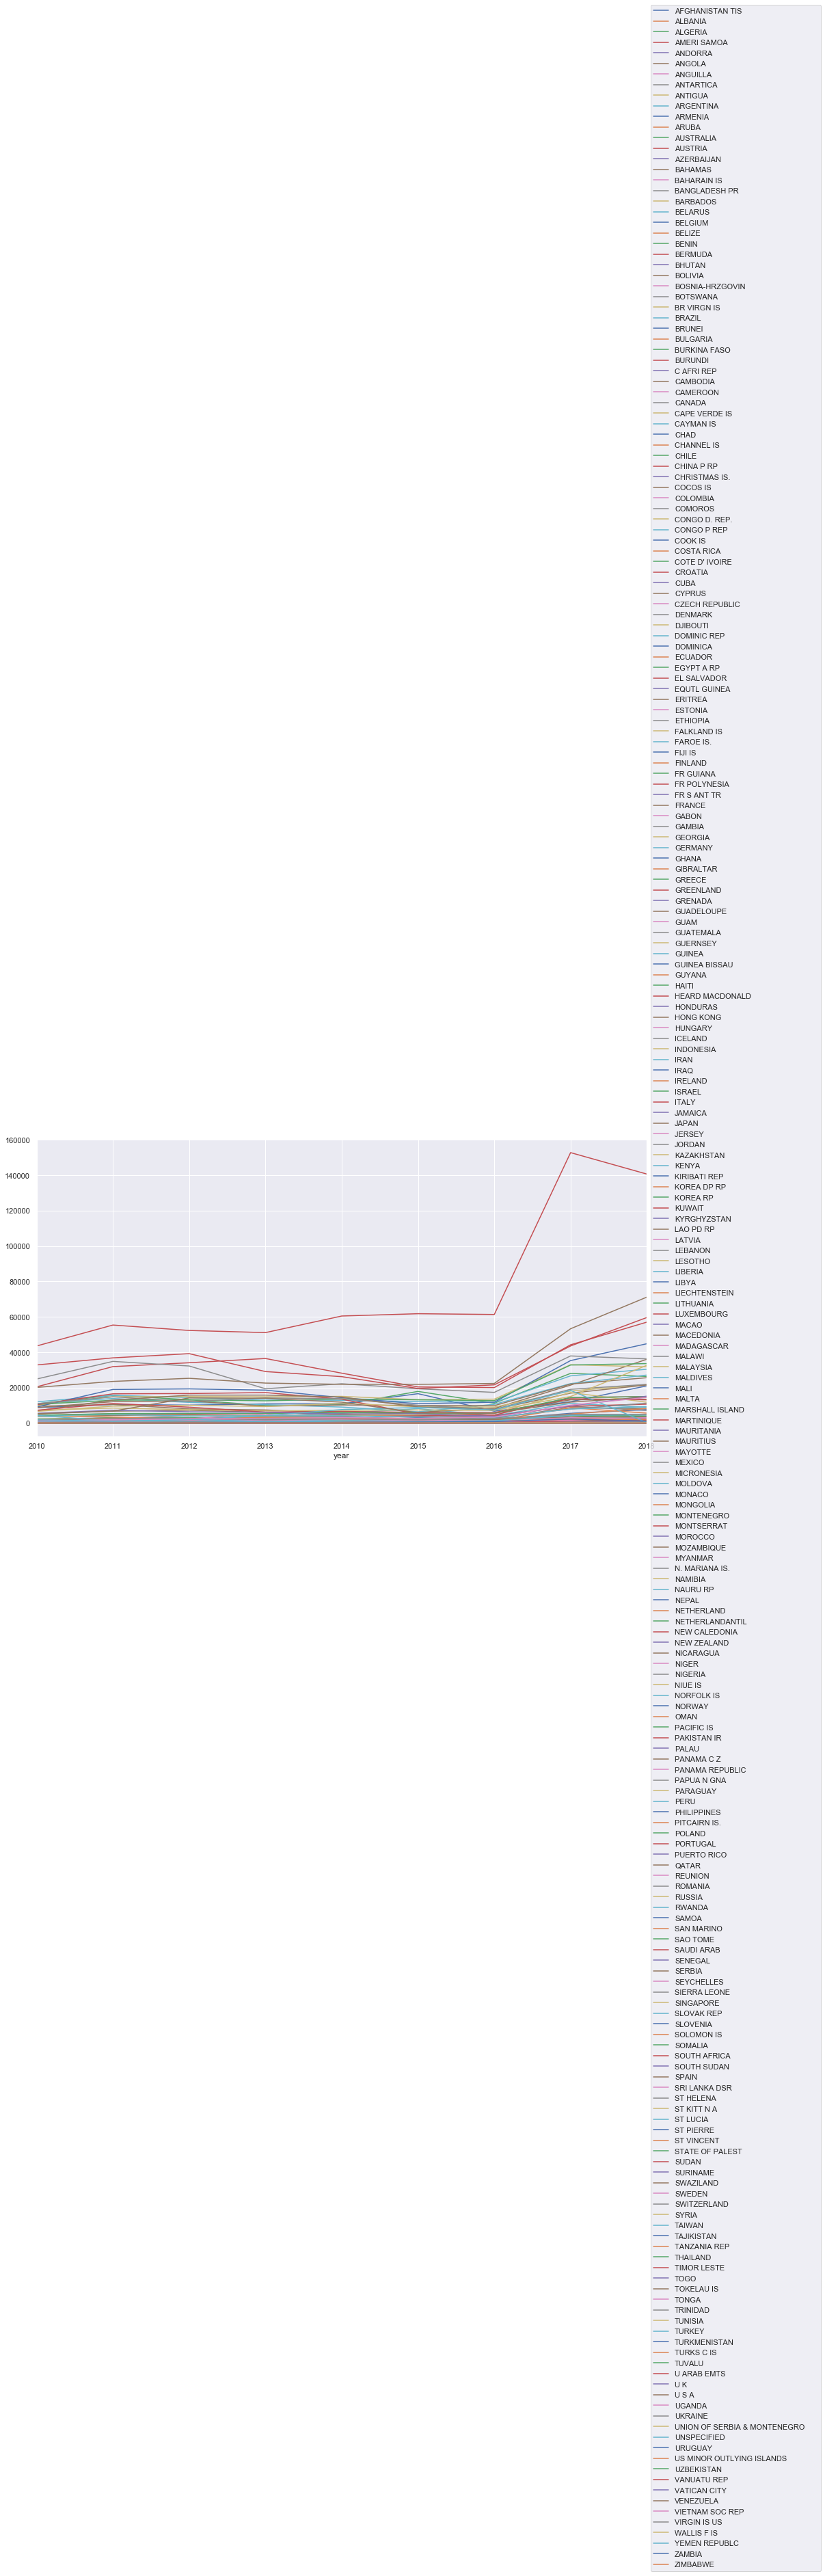

In [28]:
# grouping by year and the country and dsplaying the plot
df.groupby(['year', 'country']).sum()['value'].unstack().plot(figsize = (16,8))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

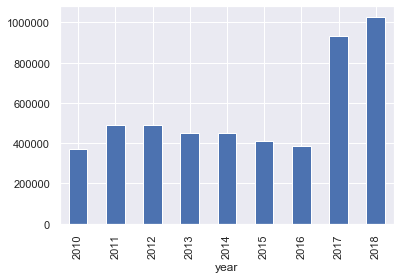

In [29]:
# year wise import plot
df.groupby(['year']).sum()['value'].plot.bar()

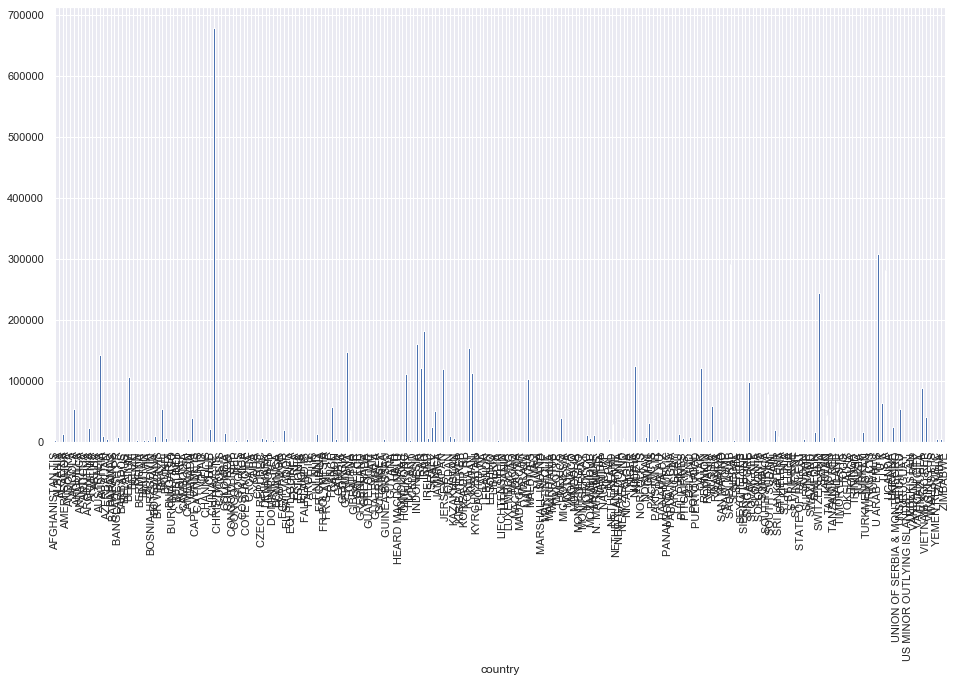

In [30]:
# country wise value plot
df.groupby(['country']).sum()['value'].plot.bar(figsize = (16,8))

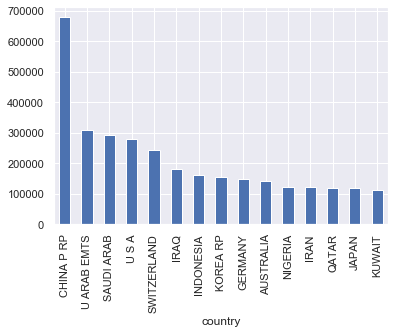

In [31]:
# country wise value plot for highest 15 countries
df.groupby(['country']).sum().nlargest(15, ['value'])['value'].plot.bar()

In [32]:
# grouping by HSCode and then country to have an estimation of which product from which country
df.groupby(['HSCode','country']).sum()

value   year
HSCode country                      
1      ARGENTINA        0.35   24176
       AUSTRALIA        0.67   24176
       AUSTRIA          0.03   24176
       BAHARAIN IS      0.00   18130
       BELGIUM          0.18   24176
...                      ...     ...
99     VIETNAM SOC REP  8.06   22161
       VIRGIN IS US     0.00   10073
       YEMEN REPUBLC    0.40   22161
       ZAMBIA           0.53   22161
       ZIMBABWE         0.03   22161

[11818 rows x 2 columns]

In [33]:
# checking frequency of import for HSCode for imported items
df['HSCode'].value_counts()

85    2174
84    2090
39    1866
99    1836
72    1826
90    1739
76    1729
73    1619
74    1518
40    1472
71    1456
44    1451
27    1422
48    1413
41    1407
29    1344
38    1328
49    1281
94    1254
82    1253
25    1231
28    1222
78    1220
47    1206
87    1206
26    1187
32    1181
98    1177
79    1160
70    1150
30    1146
83    1141
33    1113
63    1110
96    1106
34    1104
12    1077
61    1069
68    1024
62    1006
52    999 
9     987 
42    981 
8     956 
22    944 
64    939 
69    933 
95    913 
21    912 
13    907 
54    883 
59    879 
51    878 
58    874 
35    865 
88    861 
7     842 
56    832 
55    814 
23    794 
86    788 
20    780 
18    770 
15    767 
65    760 
81    752 
17    718 
19    713 
31    706 
57    706 
60    698 
89    680 
75    680 
97    663 
91    660 
1     590 
53    567 
6     564 
37    557 
11    525 
3     518 
4     517 
5     511 
24    503 
66    496 
67    471 
92    467 
50    429 
93    391 
46    390 
43    387 

In [34]:
# considering only HSCode = 1
df[df['HSCode']==1]

,HSCode,Commodity,value,country,year
131,1,LIVE ANIMALS.,0.02,ARGENTINA,2018
214,1,LIVE ANIMALS.,0.28,AUSTRALIA,2018
304,1,LIVE ANIMALS.,NaN,AUSTRIA,2018
634,1,LIVE ANIMALS.,0.08,BELGIUM,2018
781,1,LIVE ANIMALS.,NaN,BERMUDA,2018
...,...,...,...,...,...
92519,1,LIVE ANIMALS.,2.14,U S A,2010
92617,1,LIVE ANIMALS.,NaN,UGANDA,2010
92651,1,LIVE ANIMALS.,0.00,UKRAINE,2010
92730,1,LIVE ANIMALS.,0.08,UNSPECIFIED,2010


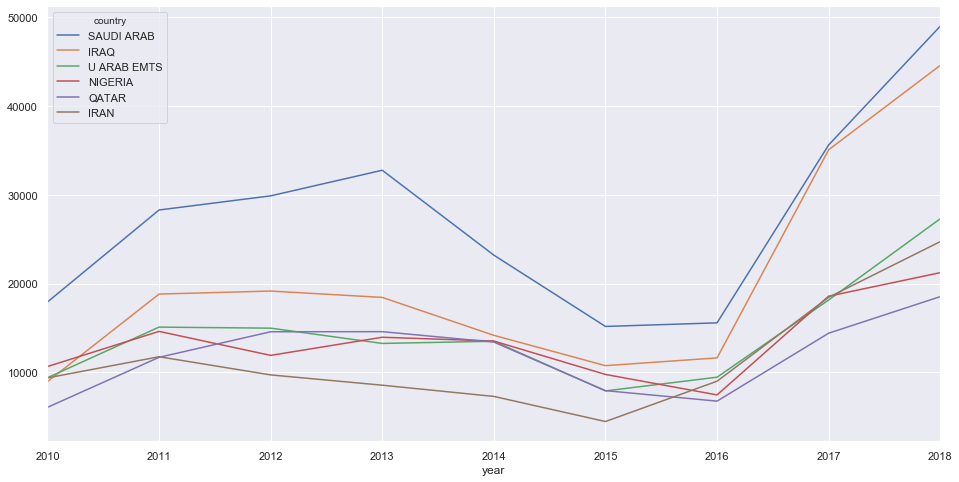

In [35]:
countries = df[df['HSCode']==27].groupby(['country']).sum().nlargest(6, ['value']).index.values

df[df['HSCode']==27].groupby(['year','country']).sum().unstack()['value'][list(countries)].plot(figsize = (16,8))

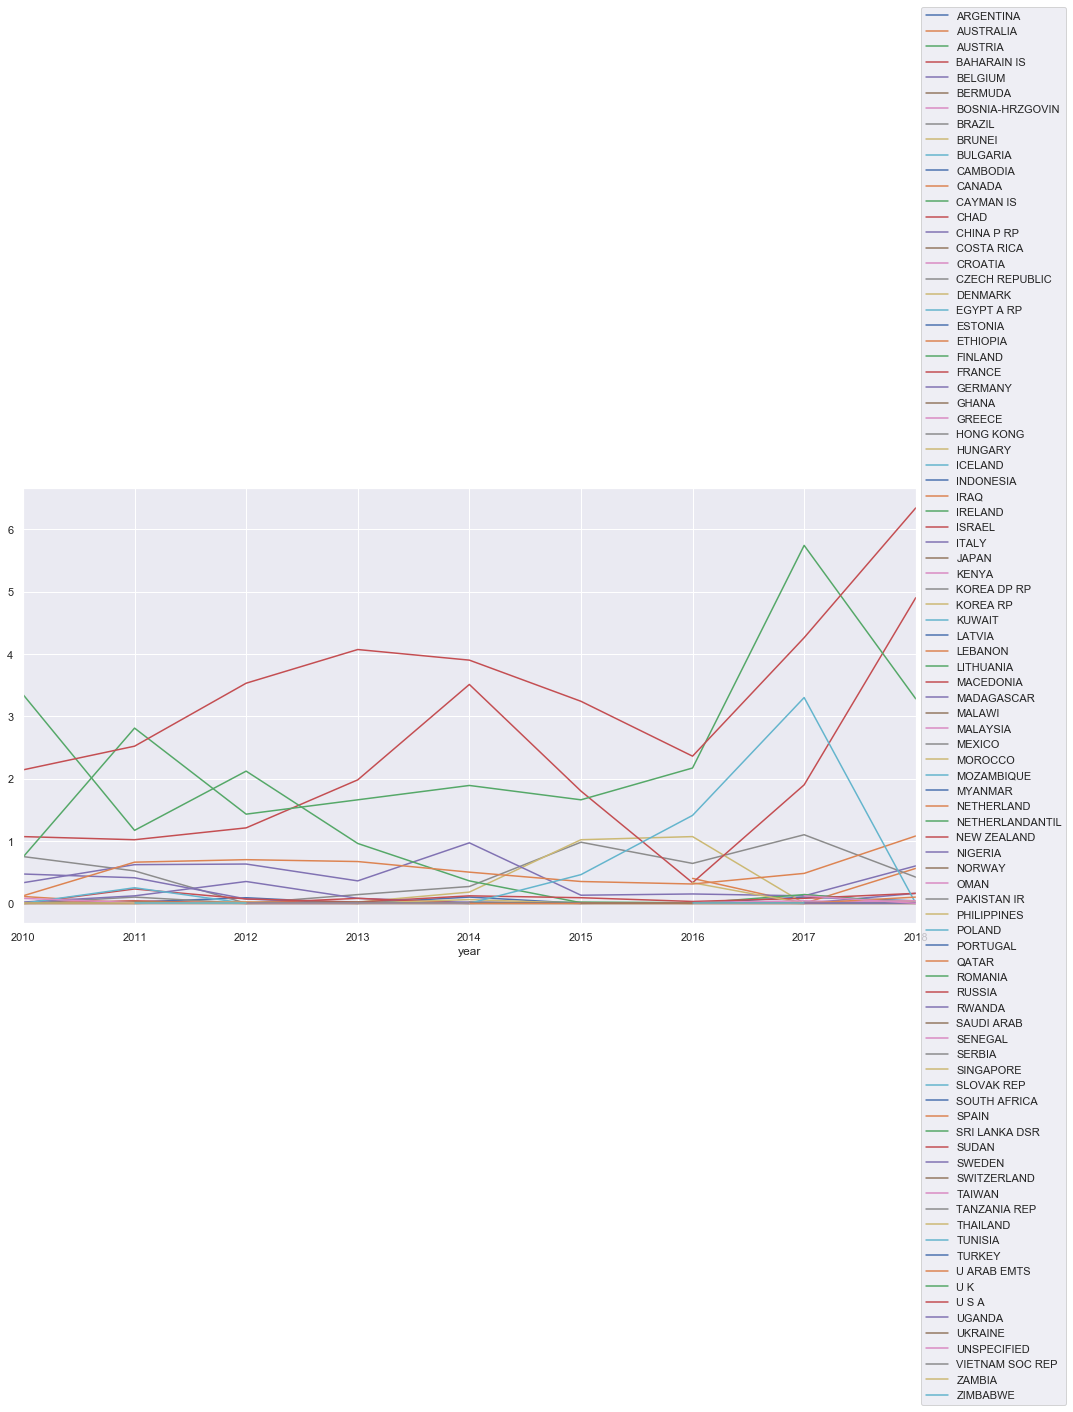

In [36]:
# for HSCode = 1 the country wise and year wise plot for all country from which we import.
df[df['HSCode']==1].groupby(['year','country']).sum().unstack()['value'].plot(figsize = (16,8), )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [37]:
# df['Commodity'].unique()

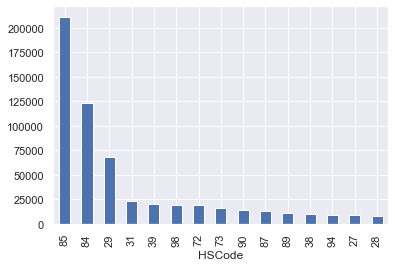

In [38]:
'''as in one of the above plot we found that we import maximum from china, 
   we are seeing which category of product we import max from chine'''
df[df['country']=='CHINA P RP'].groupby(['HSCode']).sum().nlargest(15, ['value'])['value'].plot.bar()

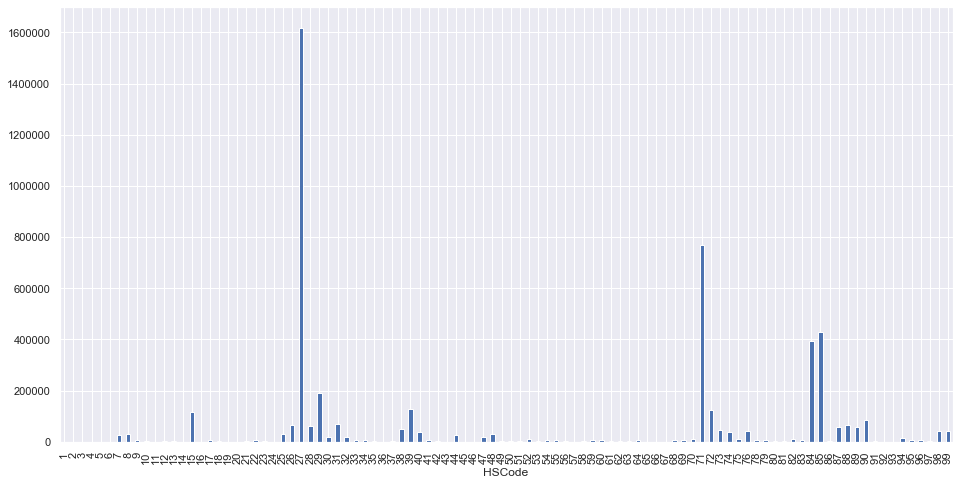

In [39]:
# showing HSCode and there trade
df.groupby(["HSCode"]).sum()['value'].plot.bar(figsize= (16,8))

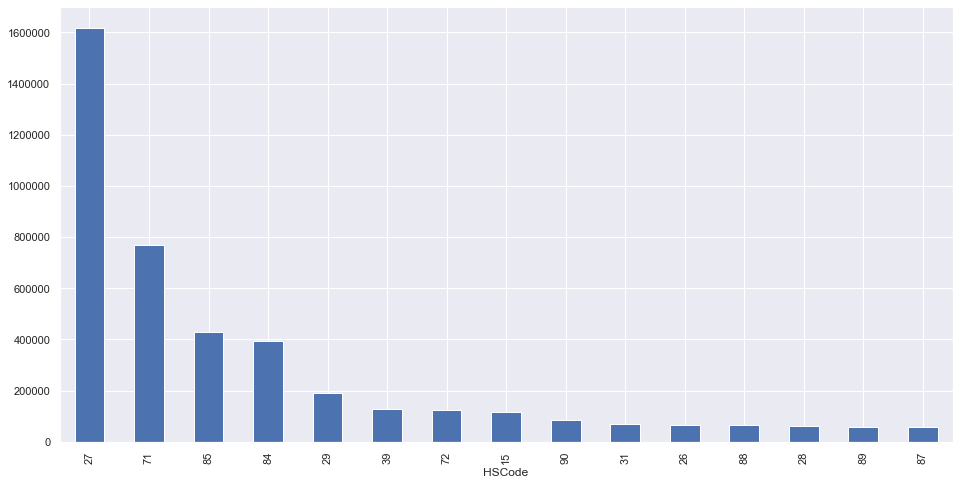

In [40]:
# top HSCode wise import 
df.groupby(["HSCode"]).sum().nlargest(15,['value'])['value'].plot.bar(figsize= (16,8))

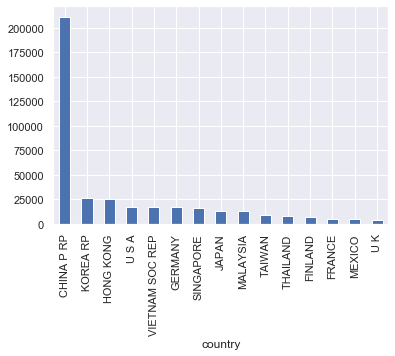

In [41]:
df[df['HSCode']==85].groupby(['country']).sum().nlargest(15, ['value'])['value'].plot.bar()

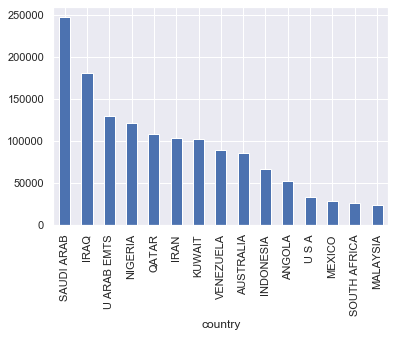

In [42]:
df[df['HSCode']==27].groupby(['country']).sum().nlargest(15, ['value'])['value'].plot.bar()

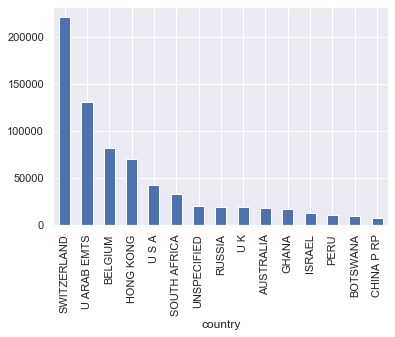

In [43]:
df[df['HSCode']==71].groupby(['country']).sum().nlargest(15, ['value'])['value'].plot.bar()

In [44]:
df[df['HSCode']==27]

,HSCode,Commodity,value,country,year
9,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",0.00,AFGHANISTAN TIS,2018
55,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",1559.37,ALGERIA,2018
95,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",4012.00,ANGOLA,2018
127,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",NaN,ANTIGUA,2018
150,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",47.16,ARGENTINA,2018
...,...,...,...,...,...
92866,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",0.31,UZBEKISTAN,2010
92890,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",5203.69,VENEZUELA,2010
92947,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",76.59,VIETNAM SOC REP,2010
93013,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",NaN,VIRGIN IS US,2010


In [45]:
# what did india import most in any year

year = df['year'].unique()
year

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010], dtype=int64)

In [46]:
# what did india import most in any year
for each in year:
    data = df[df['year']==each]
    data = data.groupby('HSCode').sum()
    data = data.loc[data['value'].idxmax()]
    data['year'] = each
    print(data)

value    335743.56
year     2018.00  
Name: 27, dtype: float64
value    264589.04
year     2017.00  
Name: 27, dtype: float64
value    103163.12
year     2016.00  
Name: 27, dtype: float64
value    107250.79
year     2015.00  
Name: 27, dtype: float64
value    156399.99
year     2014.00  
Name: 27, dtype: float64
value    181382.57
year     2013.00  
Name: 27, dtype: float64
value    181344.64
year     2012.00  
Name: 27, dtype: float64
value    172753.87
year     2011.00  
Name: 27, dtype: float64
value    115929.1
year     2010.0  
Name: 27, dtype: float64


In [47]:
a = df.groupby(["HSCode"]).sum().nlargest(15,['value']).index.values

In [48]:
HSDesc = df.drop_duplicates(subset ="HSCode") 

HSDesc = HSDesc.sort_values('HSCode')[['HSCode','Commodity']]

HSDesc = HSDesc.reset_index(drop = True)

HSDesc[HSDesc['HSCode'].isin(a)]

,HSCode,Commodity
14,15,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.
25,26,"ORES, SLAG AND ASH."
26,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES."
27,28,"INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMPOUNDS OF PRECIOUS METALS, OF RARE-EARTH METALS, OR RADI. ELEM. OR OF ISOTOPES."
28,29,ORGANIC CHEMICALS
30,31,FERTILISERS.
38,39,PLASTIC AND ARTICLES THEREOF.
70,71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN."
71,72,IRON AND STEEL
82,84,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF."


In [49]:
df[['HSCode','Commodity'].unique()

SyntaxError: unexpected EOF while parsing (<ipython-input-49-6ef1880f5eb6>, line 1)

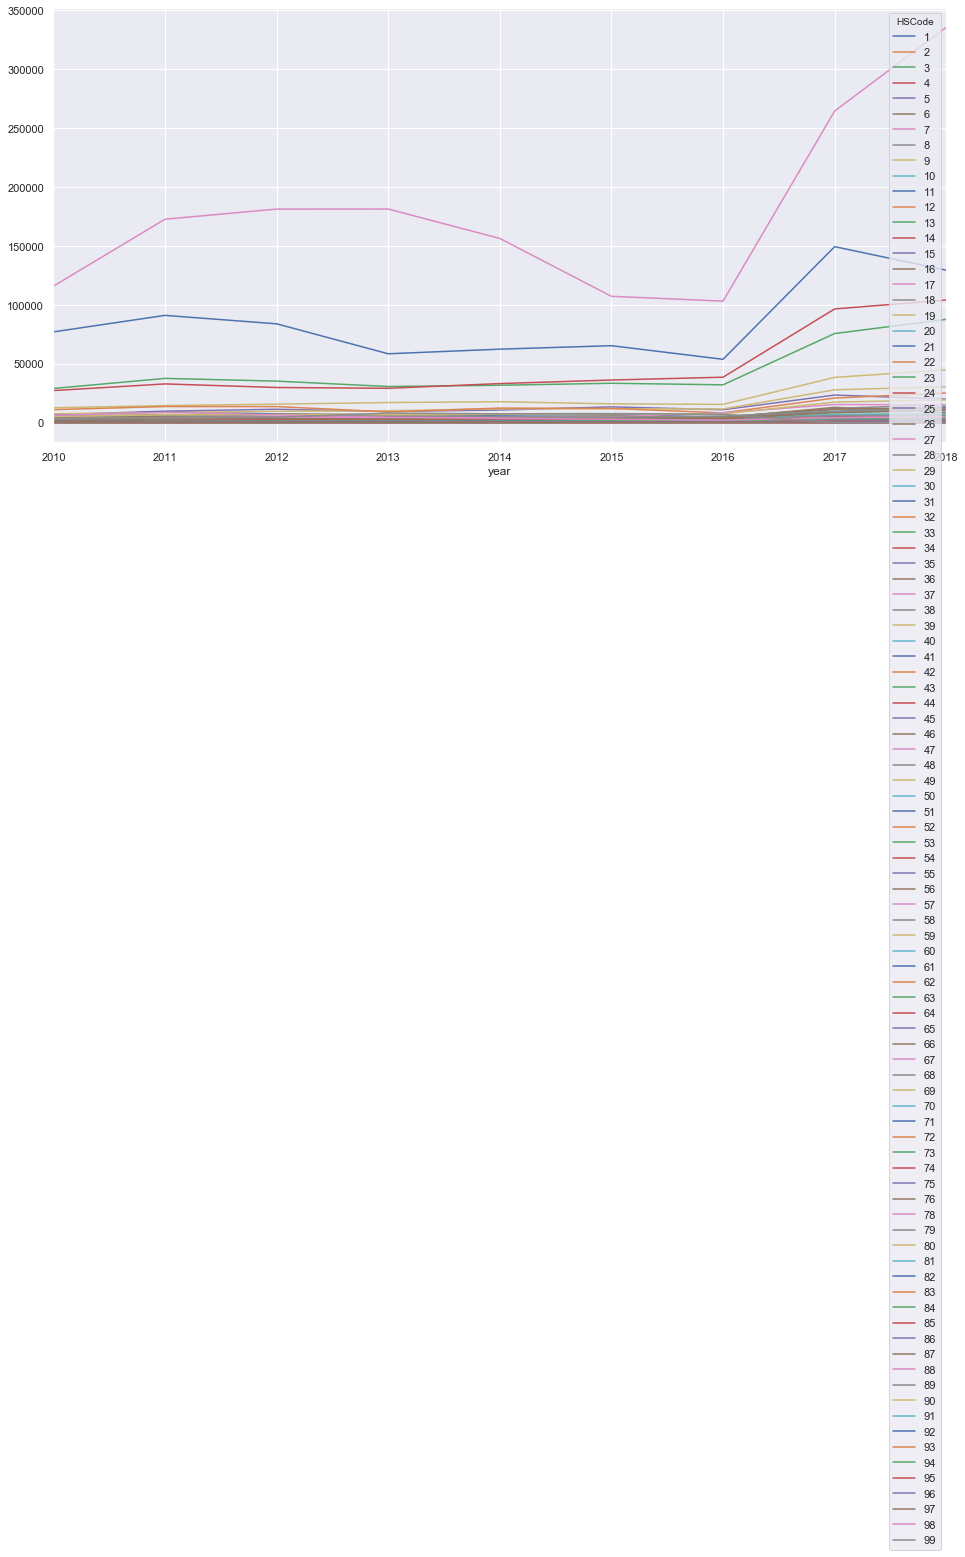

In [50]:
df.groupby(['year','HSCode']).sum().unstack()['value'].plot(figsize = (16,8))


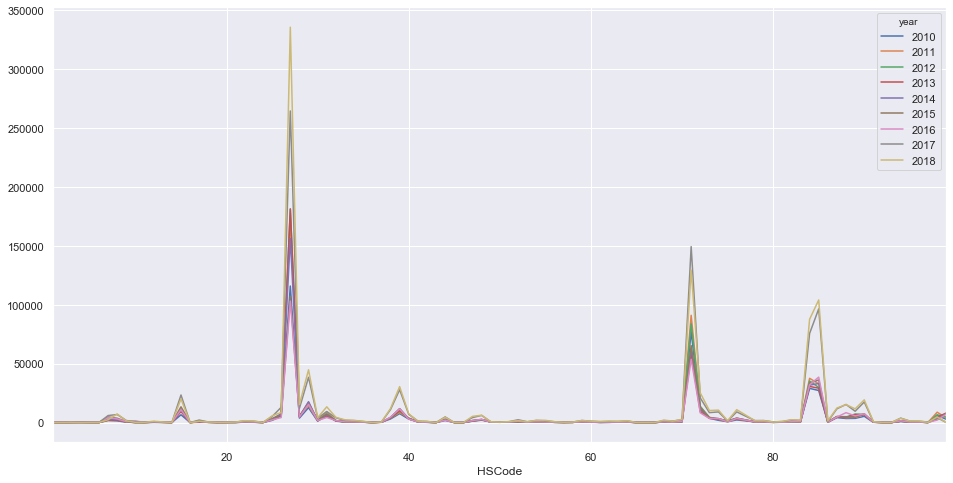

In [51]:
df.groupby(['HSCode','year']).sum().unstack()['value'].plot(figsize = (16,8))


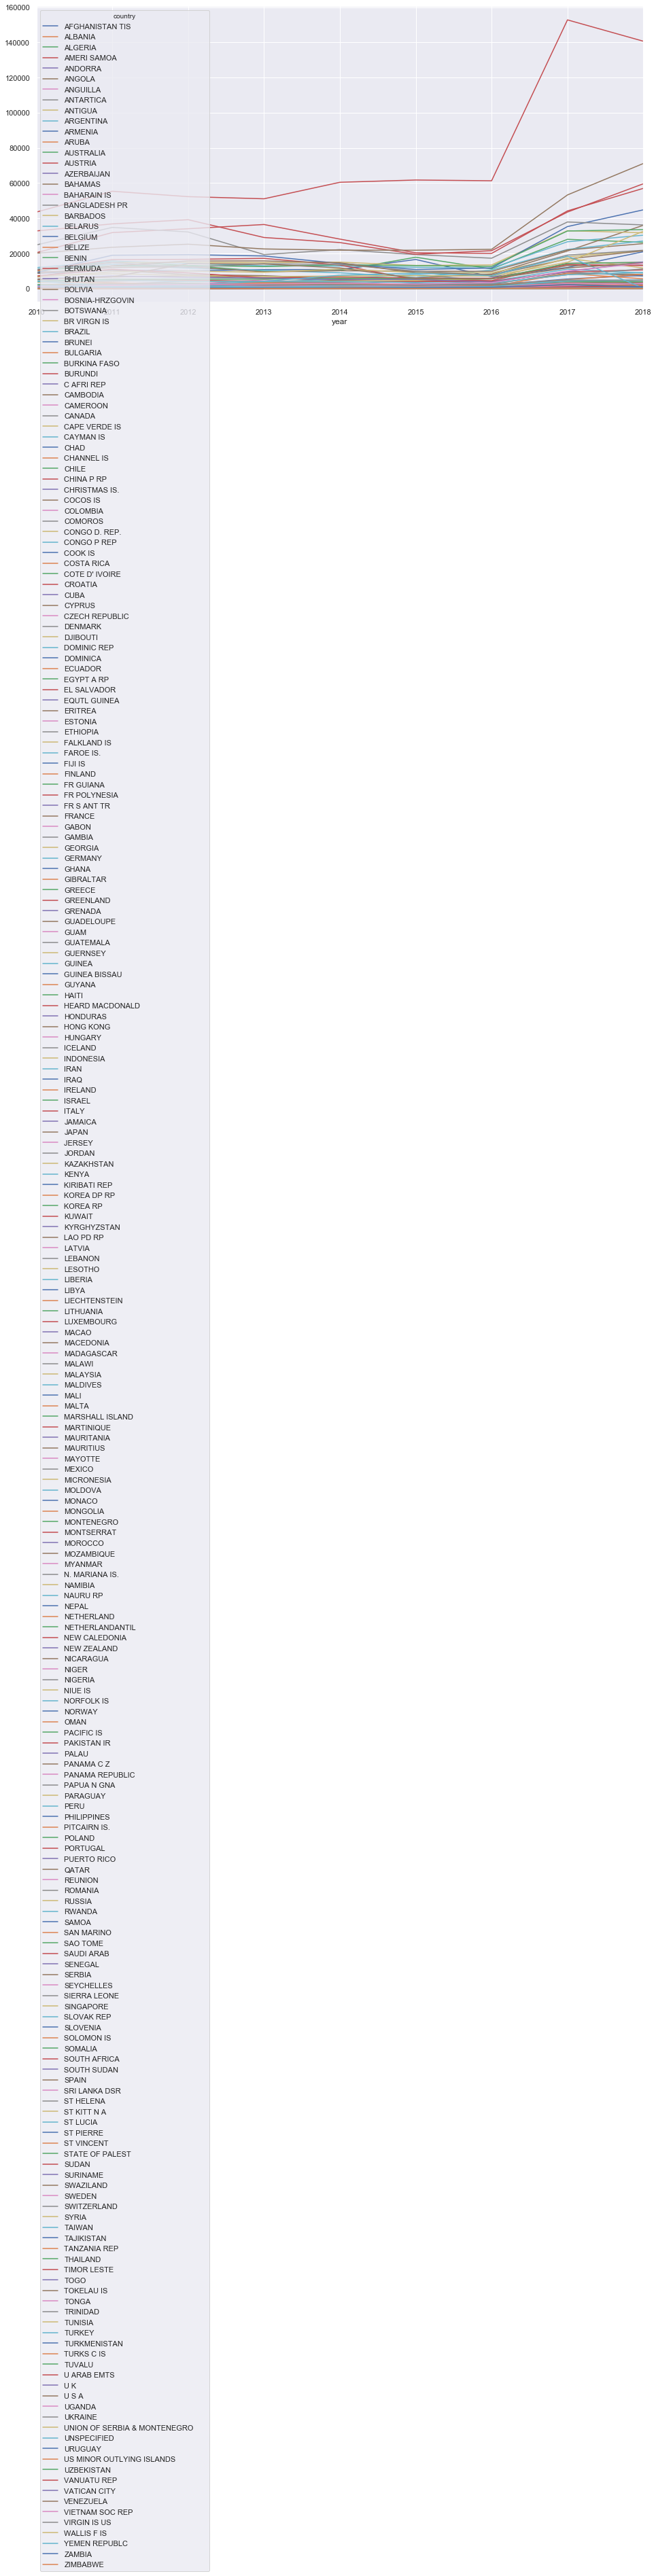

In [53]:
df.groupby(['year','country']).sum().unstack()['value'].plot(figsize = (16,8))


In [76]:
df.groupby(['country','year']).sum()['value'].unstack()


year,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,
AFGHANISTAN TIS,146.01,132.49,159.53,208.76,261.92,615.80,292.90,867.54,870.88
ALBANIA,0.11,141.13,31.05,198.79,50.77,34.36,6.50,77.70,45.24
ALGERIA,1816.19,2111.43,683.54,860.89,551.81,598.86,605.11,2521.92,3393.88
AMERI SAMOA,0.15,1.40,0.78,0.12,0.66,2.26,0.14,0.62,0.00
ANDORRA,0.01,0.03,0.01,0.00,5.28,0.00,0.09,0.00,0.06
ANGOLA,5112.13,6625.07,7157.52,5992.31,4617.63,5533.60,2596.48,8647.70,8054.96
ANGUILLA,0.01,0.13,0.00,0.00,0.07,0.00,0.00,0.36,0.38
ANTARTICA,0.08,0.44,0.00,0.41,4.83,2.22,0.49,0.10,0.06
ANTIGUA,15.62,0.06,0.24,0.04,0.49,0.00,0.00,0.04,0.30


In [74]:
df.groupby(['country','year']).sum()['value'].unstack().idxmax()


year
2010    CHINA P RP
2011    CHINA P RP
2012    CHINA P RP
2013    CHINA P RP
2014    CHINA P RP
2015    CHINA P RP
2016    CHINA P RP
2017    CHINA P RP
2018    CHINA P RP
dtype: object

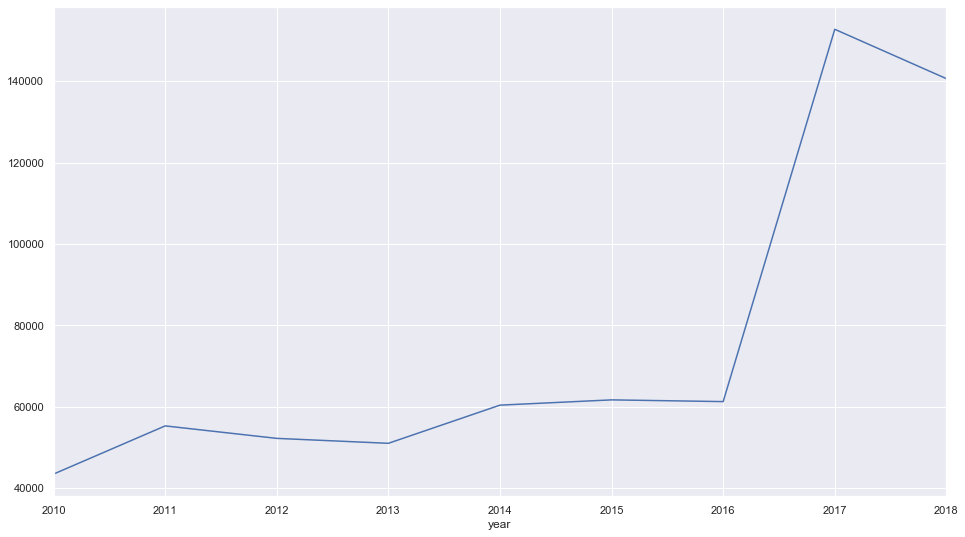

In [79]:
df[df['country'] == 'CHINA P RP'].groupby(['year']).sum()['value'].plot(figsize = (16,9))


In [70]:
df.groupby(['year', 'country']).sum()

HSCode    value
year country                         
2010 AFGHANISTAN TIS  1444    146.01 
     ALBANIA          279     0.11   
     ALGERIA          1313    1816.19
     AMERI SAMOA      635     0.15   
     ANDORRA          187     0.01   
...                   ...      ...   
2018 VIRGIN IS US     2046    1.54   
     WALLIS F IS      314     0.00   
     YEMEN REPUBLC    1598    23.50  
     ZAMBIA           2800    1021.00
     ZIMBABWE         2108    15.62  

[2072 rows x 2 columns]